In [0]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

Things to learn on Day 2

*   Learning how to convert images to grayscale with OpenCV<br>
*   Performing edge detection<br>
*   Thresholding a grayscale image<br>
*   Finding, counting, and drawing contours<br>
*   Conducting erosion and dilation<br>
*   Masking an image

## Convert images to grayscale
Use the function cv2.imread() to read an image<br>
*1* Loads a color image<br>
*0* Loads image in grayscale mode<br>
*-1* Loads image as such including alpha channel

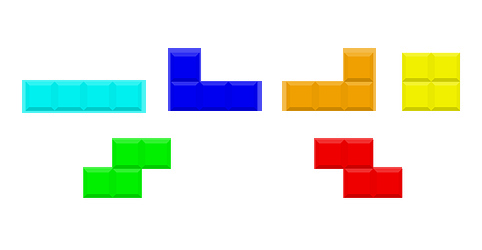

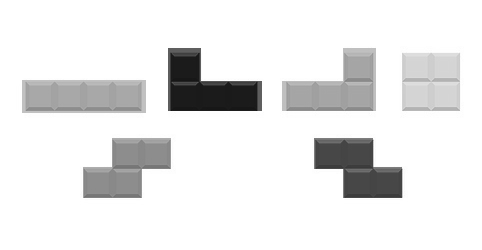

In [0]:
path='/content/tetris_blocks.png'
image=cv2.imread(path)
gray=cv2.imread(path,0)
cv2_imshow(image)
cv2_imshow(gray)

## Performing Edge Detection

We provide three parameters to the cv2.Canny  function:

img : The gray  image.<br>
minVal : A minimum threshold, in our case 30 <br>
maxVal : The maximum threshold which is 150  in our example.<br>
aperture_size : The Sobel kernel size. By default this value is 3  and hence is not shown on Line 25.

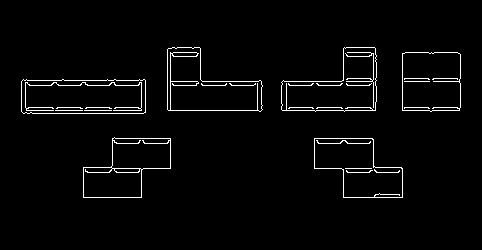

In [0]:
edge=cv2.Canny(gray,30,150)
cv2_imshow(edge)

## Thresholding
Image thresholding is an important intermediary step for image processing pipelines. Thresholding can help us to remove lighter or darker regions and contours of images.

---Grabbing all pixels in the gray  image greater than 225 and setting them to 0 (black) which corresponds to the background of the image<br>
---Setting pixel vales less than 225 to 255 (white) which corresponds to the foreground of the image (i.e., the Tetris blocks themselves).


For more information on the cv2.threshold function, including how the thresholding flags work, be sure to refer to official [OpenCV documentation](https://docs.opencv.org/3.4.0/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a19120b1a11d8067576cc24f4d2f03754)

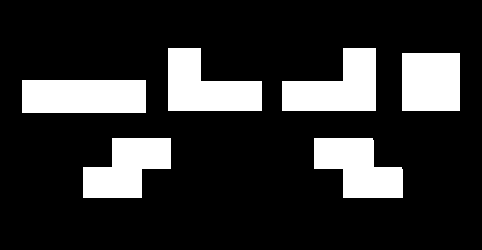

In [0]:
thresh=cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

## Detecting and Drawing Contours

we use **cv2.findContours()**  to detect the contours in the image. Take note of the parameter flags but for now let’s keep things simple — our algorithm is finding all foreground (white) pixels in the thresh.copy()  image.


In the next step, c  from the cnts  list on the image using the appropriately named cv2.drawContours . I chose purple which is represented by the tuple (240, 0, 159). You can pick any colour of your choice

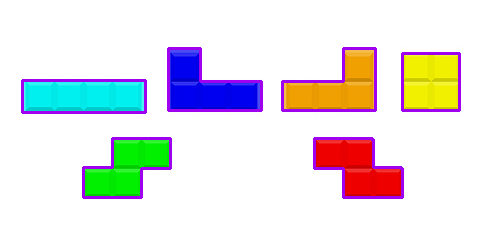

In [0]:
## find contours (i.e., outlines) of the foreground objects in the thresholded image
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
output=image.copy()

for c in cnts:
  #draw each contour on the output image with a 3px thick purple
  cv2.drawContours(output,[c],-1,(240,0,159),2)
cv2_imshow(output)

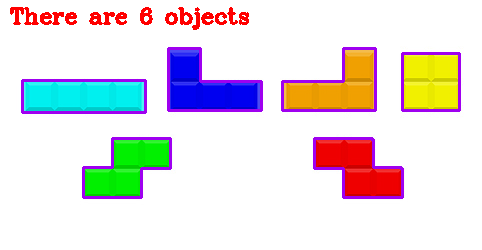

In [0]:
# Putting Text in the image
cv2.putText(output,'There are {} objects'.format(len(cnts)),(10,23),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,0,255),2)
cv2_imshow(output)

## Erosions and Dilation

Erosions and dilations are typically used to reduce noise in binary images (a side effect of thresholding). To reduce the size of foreground objects we can erode away pixels given a number of iterations:

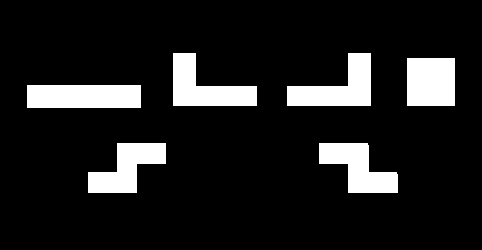

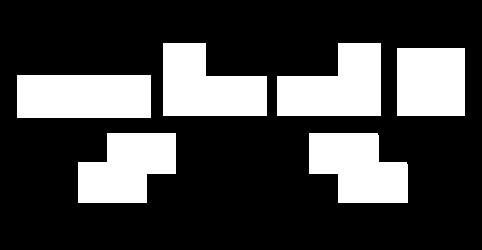

In [0]:
mask=thresh.copy()
mask=cv2.erode(mask,kernel=None,iterations=5)
cv2_imshow(mask)

#Similarly we can enlarge the region by using cv2.dilate()
mask=thresh.copy()
mask=cv2.dilate(mask,kernel=None,iterations=5)
cv2_imshow(mask)

## Masking and BitWise operations

Masks allow us to “mask out” regions of an image we are uninterested in. We call them “masks” because they will hide regions of images we do not care about.

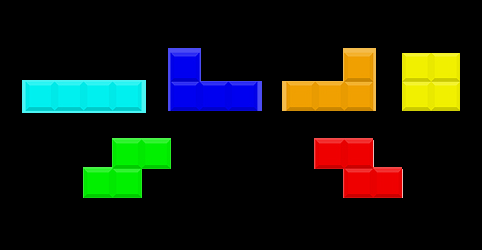

In [0]:
mask=thresh.copy()
output=cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(output)

The background is black now and our foreground consists of colored pixels — any pixels masked by our mask  image.

## S